# Weather Exploration Project - Udacity
## Diego Merino Muñoz

First of all, I used the following SQL queries to extract the data: 

* For my local City: 

SELECT <br>
    year, <br>
    avg_temp as Average_Temperature <br>
FROM <br>
    city_data <br>
WHERE <br>
    city = 'Madrid' <br>
ORDER BY <br>
    year <br>

* For the Global Data: 

SELECT <br>
    year, <br>
    avg_temp as average_temperature <br>
FROM <br>
    global_data <br> 
ORDER BY <br>
    year <br> 

Now, we import the necessary libraries to take on our project:

In [29]:
# Importing needed libraries for the exploration and Setting the matplotlib figure size
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.rcParams["figure.figsize"] = (16,5)



Now it's time to load our data, selecting our index col and parsing the dates in case we need to manage them.

In [30]:
# Loading the CSVs as Pandas dataframes, with the year as index and the dates parsed

city_data = pd.read_csv('citywide-results.csv', index_col='year', parse_dates=True)
global_data = pd.read_csv('global-data.csv', index_col = 'year', parse_dates= True)

We check for Null values that will cause trouble when calculating the moving average:

In [31]:
# Checking for null Data on our dataframes
print('There are {} Null values in the City Dataframe'.format(city_data['average_temperature'].isnull().sum()))
print('There are {} Null values in the City Dataframe'.format(global_data['average_temperature'].isnull().sum()))

There are 4 Null values in the City Dataframe
There are 0 Null values in the City Dataframe


As there are just 4 Null Values on the cities Dataframe, we'll choose to drop them

In [32]:
# Droping the NAs on the dataframe
city_data.dropna(axis=0, inplace = True)

Now, Let's create our moving Average values. I've chosen a decade because it seemed like a logical value to consider (a decade) for temperature changes.

In [33]:
# Let's do a 10 year moving average 
city_data = city_data['average_temperature'].to_frame()
global_data = global_data['average_temperature'].to_frame()

city_data['SMA10Year'] = city_data['average_temperature'].rolling(10).mean()
global_data['SMA10Year'] = global_data['average_temperature'].rolling(10).mean()

Now, let's compare the effect that our Moving Average had in our data

<AxesSubplot:xlabel='year'>

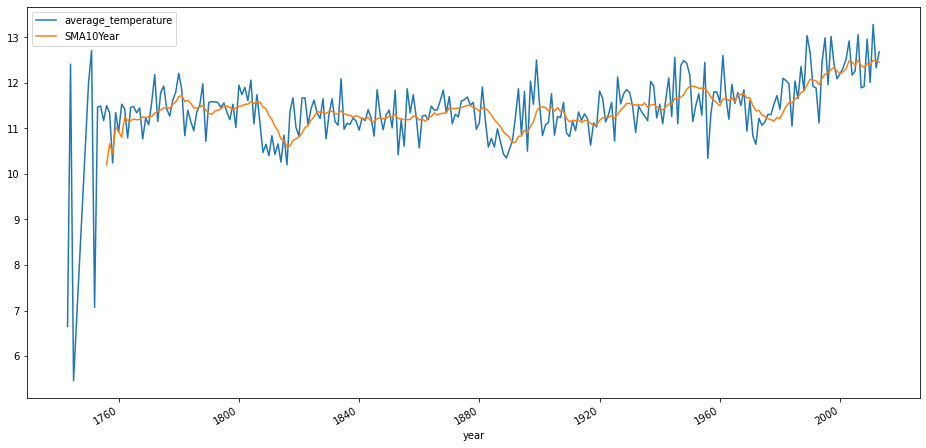

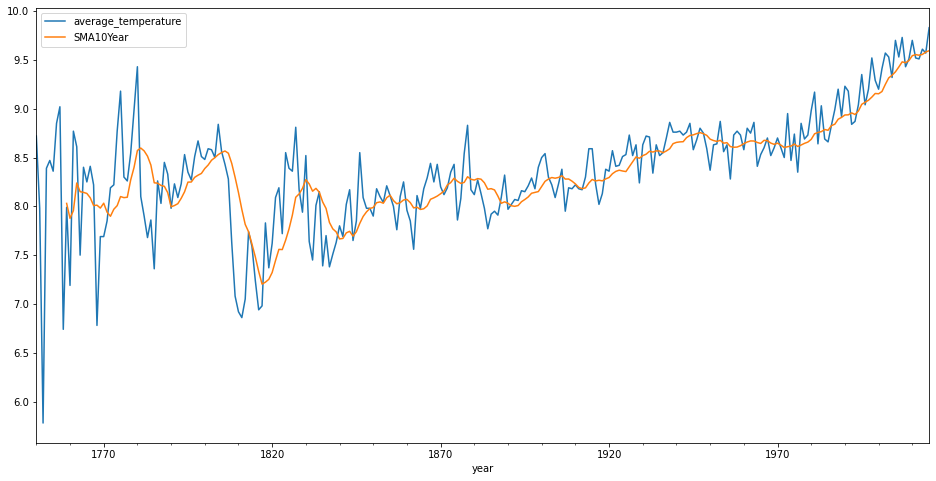

In [34]:
# Comparing Moving Average to Granular data
city_data[['average_temperature', 'SMA10Year']].plot(label = 'Temperature', figsize = (16,8))
global_data[['average_temperature', 'SMA10Year']].plot(label = 'Temperature', figsize = (16,8))


Finally, let's plot our Moving Average data for Madrid and for the Global Temperature.

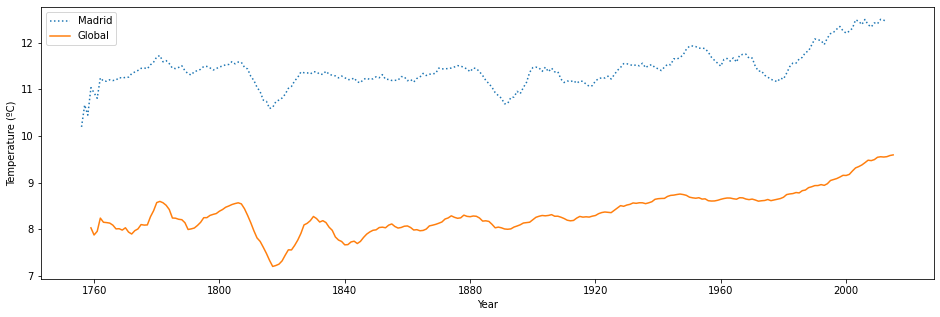

In [37]:
plt.plot(city_data['SMA10Year'], label = 'Madrid', linestyle = ':')
plt.plot(global_data['SMA10Year'], label = 'Global', linestyle = '-')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature (ºC)')
plt.show()

### Conclusions: 
* Madrid is by mean, 4 degrees hotter than the global average, which makes sense since Madrid is located relatively near to the Equator.
* We can see the same trends on both graphs, for example the drop in temperatures around 1820. 
* We can observe that in the last years (2000s forward), both Madrid and Global Temperatures have suffered a constant hike. Madrid mean temperature has risen more sharply than the global average.
* We can see that Madrid suffered two drops in average temperature aroung 1890 and 1980 that seem to be milder in the global average. This could be due to local phenomena such as "El niño". 
